## Angel Barral Diaz

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np
import pandas as pd

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, mean_squared_error

#Models
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [2]:
#Preparing the data:

filePath = 'https://opendata.cern.ch/record/328/files/atlas-higgs-challenge-2014-v2.csv.gz'
filePath = 'https://akalinow.web.cern.ch/akalinow/HiggsBoson_ML_challenge/atlas-higgs-challenge-2014-v2.csv.gz'

df = pd.read_csv(filePath)

#Select a sample of 10000
df=df.sample(n=10000, random_state=1)

#We change the labels signal for 1s and 0s
df['Label'] = df['Label']=='s'
df['Label'] = df['Label'].astype(int)

#Split the test/train in a 2:8 (0.25):
df_train, df_test = train_test_split(df, test_size = 0.25, random_state=42)

#We select the y data and the x data and drop unusefull columns
y_train = df_train['Label'].to_numpy()
y_test = df_test['Label'].to_numpy()

df_train.drop(columns = ['KaggleSet','KaggleWeight','Weight', 'EventId', 'Label'], inplace = True)
df_test.drop(columns = ['KaggleSet','KaggleWeight','Weight', 'EventId', 'Label'], inplace = True)

x_train, x_test = df_train.to_numpy(), df_test.to_numpy()

#We scale our input data for the processing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


print(colored("Train labels shape:","blue"), y_train.shape)
print(colored("Test labels shape:","blue"), y_test.shape)

print(colored("Train features shape:","blue"), x_train.shape)
print(colored("Test features shape:","blue"), x_test.shape)



Train labels shape: (7500,)
Test labels shape: (2500,)
Train features shape: (7500, 30)
Test features shape: (2500, 30)


## We create the classifier model

In [3]:

hidden_layer_sizes = (128,128,128)

model =  MLPClassifier(random_state=1, max_iter=500, 
                      hidden_layer_sizes=hidden_layer_sizes,
                      learning_rate_init = 1E-4,
                      tol=5E-7
                     )

## Now we run the model with the training data and we get the loss curve

/home/angel/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


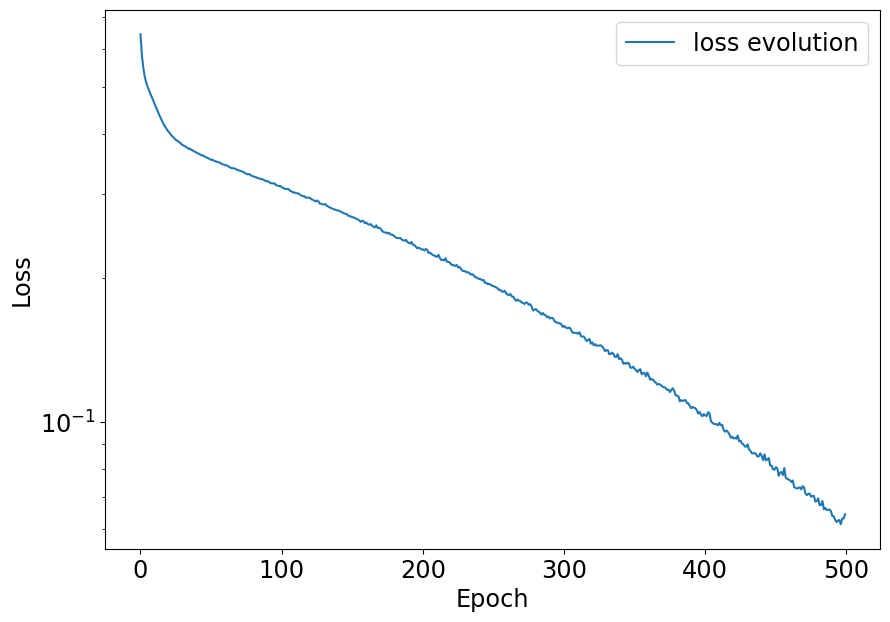

In [4]:

model.fit(x_train, y_train)
loss_history = model.loss_curve_

plt.plot(loss_history, label="loss evolution")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')


## Accuracy and confusion matrix for train data

MSE on the training data: 0.0108
Test set: accuracy score 0.9892


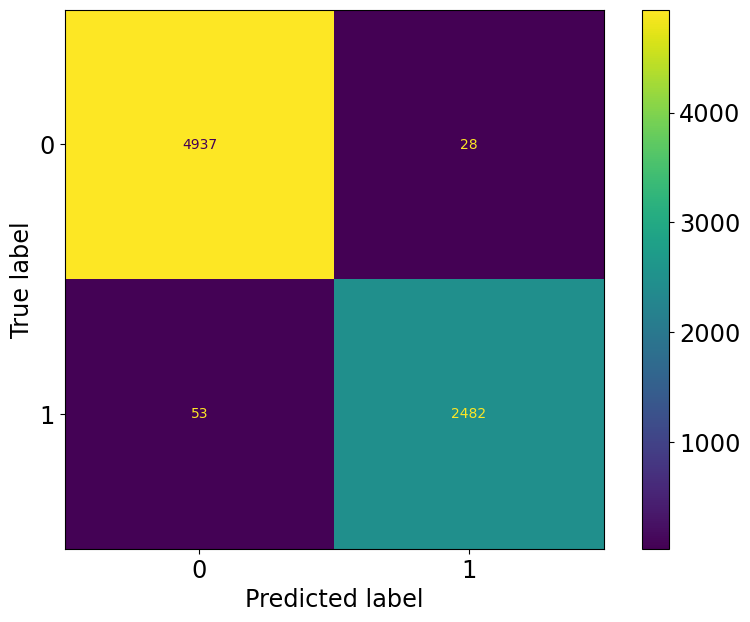

In [5]:
y_pred = model.predict(x_train)

mse = mean_squared_error(y_train, y_pred)
print(colored("MSE on the training data:", "blue"), mse)

acc= accuracy_score(y_train, y_pred)
print(colored('Test set: accuracy score','blue'), acc)

ConfusionMatrixDisplay.from_predictions(y_train, y_pred)


## Accuracy and confusion matrix for test data

MSE on the training data: 0.2296
Test set: accuracy score 0.7704


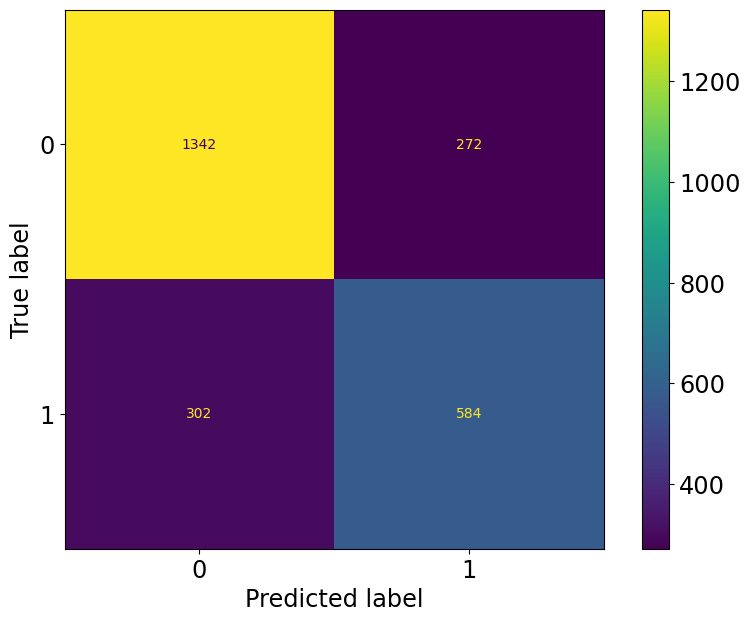

In [6]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(colored("MSE on the training data:", "blue"), mse)

acc= accuracy_score(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(colored('Test set: accuracy score','blue'), acc)


### We have obtained an accuracy of 98% in the train data, and a 77% on the test data, so we can consider this NN model as successful